In [61]:
from glob import glob
import pandas as pd
import re


In [80]:
# Ścieżki do plików z napisami
substitles_paths = sorted(glob("E:/Projekty_Programy/NLP/Dane/JujutsuKaisenEp/*.ass"))

In [81]:
substitles_paths[:5]

['E:/Projekty_Programy/NLP/Dane/JujutsuKaisenEp\\Jujutsu Kaisen - 01.ass',
 'E:/Projekty_Programy/NLP/Dane/JujutsuKaisenEp\\Jujutsu Kaisen - 02.ass',
 'E:/Projekty_Programy/NLP/Dane/JujutsuKaisenEp\\Jujutsu Kaisen - 03.ass',
 'E:/Projekty_Programy/NLP/Dane/JujutsuKaisenEp\\Jujutsu Kaisen - 04.ass',
 'E:/Projekty_Programy/NLP/Dane/JujutsuKaisenEp\\Jujutsu Kaisen - 05.ass']

In [82]:
# Pusta lista do przechowywania danych
data = []

In [83]:
# Przejście przez wszystkie pliki
for path in substitles_paths:
    # Wczytanie pliku
    with open(path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Przejście przez każdą linię w pliku
    for line in lines:
        # Sprawdzenie, czy linia jest dialogiem
        if line.startswith('Dialogue:'):
            # Podział linii na części
            parts = line.split(',')
            
            # Wydobycie nazwy postaci i tekstu
            name = parts[4]
            text = parts[9]
            
            # Usunięcie znaków nowej linii i cudzysłowów z tekstu
            text = re.sub(r'\\N', ' ', text)
            text = re.sub(r'"', '', text)
            
            # Dodanie danych do listy
            data.append([name, text])


In [84]:
# Utworzenie DataFrame z danymi
df = pd.DataFrame(data, columns=['Name', 'Text'])

In [85]:
# Wyświetlenie pierwszych kilku wierszy
print(df.head())

    Name                                               Text
0  Gojou                                         Morning.\n
1  Gojou                  So which one are you right now?\n
2  Yuuji                                    Aren't you...\n
3  Gojou                                    Gojou Satoru.\n
4  Gojou  I'm in charge of the  first-years at Jujutsu T...


In [86]:
# Zliczanie liczby dialogów dla każdej postaci
dialog_counts = df['Name'].value_counts()

# Wyświetlenie wyników
print(dialog_counts)


Name
Yuuji           968
Fushiguro       732
Gojou           660
Kugisaki        471
Mahito          395
               ... 
Screen&Three      1
Cup               1
Flash             1
Wall              1
Mob               1
Name: count, Length: 216, dtype: int64


In [87]:
# Zapisanie wyników do pliku .txt
with open('dialog_counts1.txt', 'w', encoding='utf-8') as f:
    for name, count in dialog_counts.items():
        f.write(f'{name}: {count}\n')


In [88]:
# Słownik zawierający mapowanie starych i nowych nazw
name_mapping = {
    'YoungKamo': 'Kamo',
    'Mechamaru&Screen': 'Mechamaru',
    'Jougo': 'Jogo',
    'Nitta': 'Akari',
    'Itadori': 'Yuuji',
    'Yuji': 'Yuuji',
    'Gojo': 'Gojou',
    'Getou': 'Geto',
    'Todo': 'Toudou',
    'Ieiri': 'Shouko'
}

# Zamiana nazw
df['Name'] = df['Name'].replace(name_mapping)


In [89]:
# Wyjątki, które nie będą usuwane
exceptions = ['Grandfather', 'Frodo',  "Kamo's Mother",'MeiMei','Nishimura','Takagi','Nitta','Ino','Woman','Curse','Mother']

# Zliczenie liczby wystąpień dla każdej postaci
counts = df['Name'].value_counts()

# Utworzenie maski dla wierszy do usunięcia
mask = df['Name'].apply(lambda x: counts[x] >= 9 or x in exceptions)

# Usunięcie wierszy
df = df[mask]


In [90]:
# Lista nieprawidłowych wartości 'Name'
invalid_names = ['Pompadour', 'Student', 'Screen','Sign','President','Both','Clerk','Frodo','Momo&Screen','Narrator','Boy','Friend A']

# Usunięcie wierszy, w których 'Name' jest w liście nieprawidłowych wartości
df = df[~df['Name'].isin(invalid_names)]

In [93]:
# Usunięcie wierszy, w których 'Name' jest pusty lub zawiera tylko białe znaki
df = df[df['Name'].str.strip().astype(bool)]


In [94]:
# Zliczanie liczby dialogów dla każdej postaci
dialog_counts = df['Name'].value_counts()

# Wyświetlenie wyników
print(dialog_counts)


Name
Yuuji            1147
Gojou             759
Fushiguro         732
Kugisaki          471
Mahito            395
                 ... 
MeiMei              7
Ino                 5
Frodo               2
Grandfather         2
Kamo's Mother       1
Name: count, Length: 61, dtype: int64


In [95]:
# Zapisanie wyników do pliku .txt
with open('dialog_counts2.txt', 'w', encoding='utf-8') as f:
    for name, count in dialog_counts.items():
        f.write(f'{name}: {count}\n')


In [96]:
# Wyświetlenie pierwszych kilku wierszy
print(df.head())

    Name                                               Text
0  Gojou                                         Morning.\n
1  Gojou                  So which one are you right now?\n
2  Yuuji                                    Aren't you...\n
3  Gojou                                    Gojou Satoru.\n
4  Gojou  I'm in charge of the  first-years at Jujutsu T...


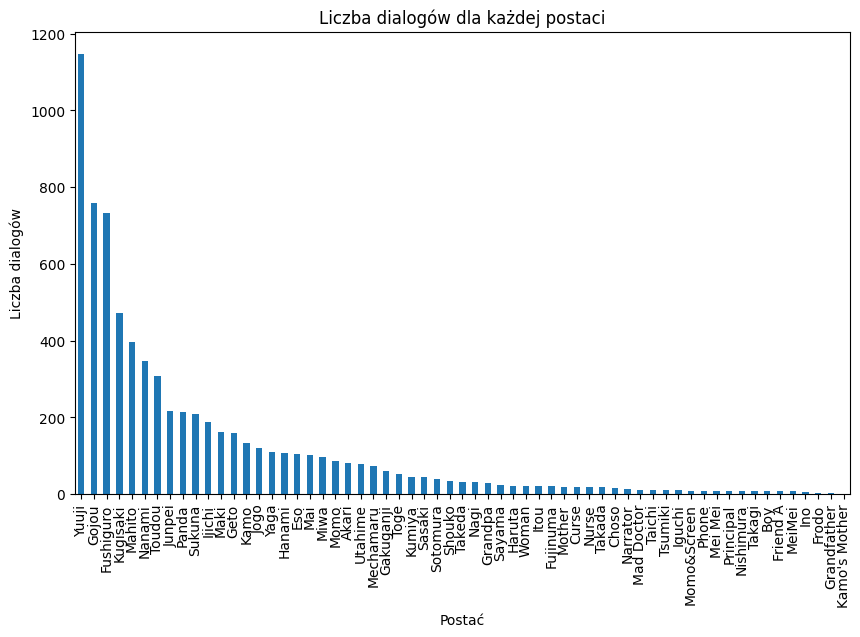

In [97]:
import matplotlib.pyplot as plt

# Zliczenie liczby dialogów dla każdej postaci
dialog_counts = df['Name'].value_counts()

# Utworzenie wykresu
plt.figure(figsize=(10, 6))
dialog_counts.plot(kind='bar')
plt.title('Liczba dialogów dla każdej postaci')
plt.xlabel('Postać')
plt.ylabel('Liczba dialogów')
plt.show()


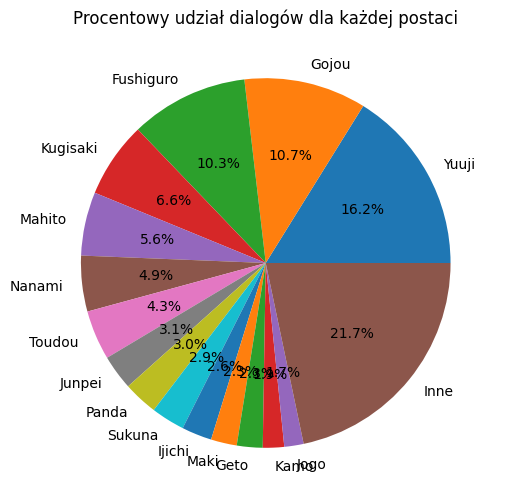

In [102]:
# Zliczenie liczby dialogów dla każdej postaci
dialog_counts = df['Name'].value_counts()

# Wybór 15 najczęściej występujących postaci
top_15 = dialog_counts[:15]
# Grupowanie reszty jako 'Inne'
other = dialog_counts[15:].sum()
top_15['Inne'] = other

# Utworzenie wykresu
plt.figure(figsize=(10, 6))
plt.pie(top_15, labels = top_15.index, autopct='%1.1f%%')
plt.title('Procentowy udział dialogów dla każdej postaci')
plt.show()


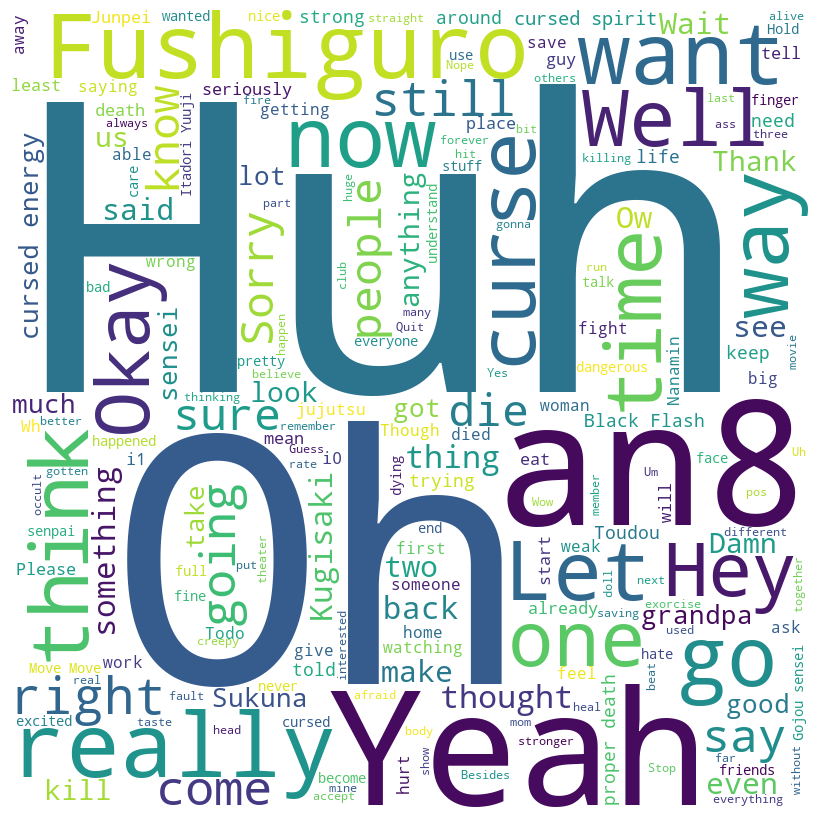

In [104]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Wybierz postać
character = 'Yuuji'

# Wybierz dialogi tej postaci
character_dialogs = df[df['Name'] == character]['Text']

# Połącz wszystkie dialogi w jeden długi tekst
text = ' '.join(character_dialogs)

# Utwórz chmurę słów
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(text)

# Wyświetl chmurę słów
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [111]:
from collections import Counter
import re

# Lista słów do zignorowania
stopwords = ['the', 'I', 'What', 'a' , 'to' , 'it','is','to','you','of','that','and','on','as','me','they','in','was','were','with','not','Is']

# Pusta lista do przechowywania wyników
results = []

# Przejście przez każdą unikalną postać
for character in df['Name'].unique():
    # Wybór dialogów tej postaci
    character_dialogs = df[df['Name'] == character]['Text']
    
    # Połączenie wszystkich dialogów w jeden długi tekst
    text = ' '.join(character_dialogs)
    
    # Usunięcie znaków interpunkcyjnych
    text = re.sub(r'[^\w\s]', '', text)
    
    # Podział tekstu na słowa
    words = text.split()
    
    # Usunięcie słów do zignorowania
    words = [word for word in words if word not in stopwords]
    
    # Zliczenie wystąpień każdego słowa
    word_counts = Counter(words)
    
    # Znalezienie najczęściej występującego słowa
    most_common_word, count = word_counts.most_common(1)[0]
    
    # Dodanie wyniku do listy
    results.append((character, most_common_word, count))

# Wyświetlenie wyników
for character, word, count in results:
    print(f'Postać: {character}, Najczęściej używane słowo: {word}, Liczba wystąpień: {count}')


Postać: Gojou, Najczęściej używane słowo: cursed, Liczba wystąpień: 39
Postać: Yuuji, Najczęściej używane słowo: Huh, Liczba wystąpień: 51
Postać: Nurse, Najczęściej używane słowo: Itadorisan, Liczba wystąpień: 3
Postać: Grandpa, Najczęściej używane słowo: club, Liczba wystąpień: 5
Postać: Fushiguro, Najczęściej używane słowo: cursed, Liczba wystąpień: 39
Postać: Sasaki, Najczęściej używane słowo: this, Liczba wystąpień: 5
Postać: Takagi, Najczęściej używane słowo: rewrote, Liczba wystąpień: 1
Postać: Iguchi, Najczęściej używane słowo: Theyre, Liczba wystąpień: 1
Postać: Phone, Najczęściej używane słowo: fad1, Liczba wystąpień: 2
Postać: Curse, Najczęściej używane słowo: time, Liczba wystąpień: 2
Postać: Sukuna, Najczęściej używane słowo: this, Liczba wystąpień: 11
Postać: Yaga, Najczęściej używane słowo: curse, Liczba wystąpień: 7
Postać: Kugisaki, Najczęściej używane słowo: You, Liczba wystąpień: 28
Postać: Woman, Najczęściej używane słowo: for, Liczba wystąpień: 4
Postać: Narrator, 

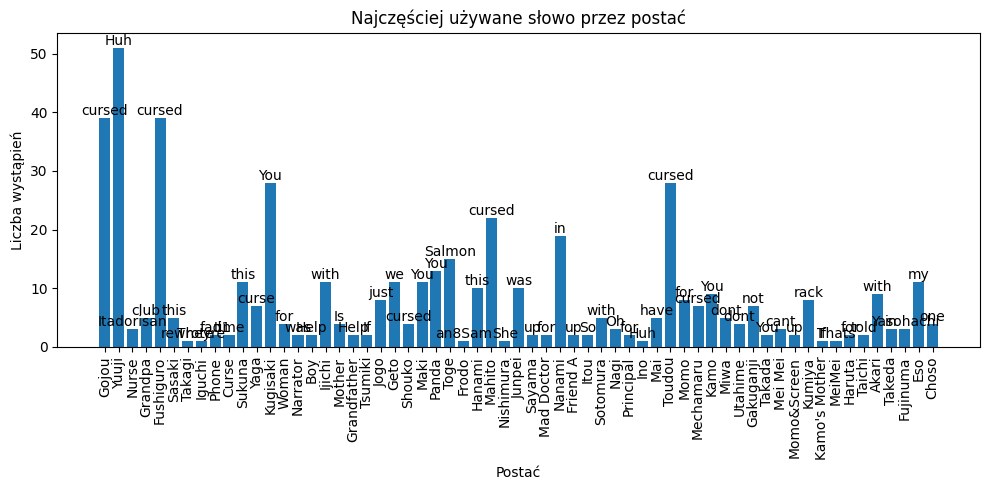

In [134]:
import matplotlib.pyplot as plt

# Przygotowanie danych do wykresu
characters = [result[0] for result in results]
words = [result[1] for result in results]
counts = [result[2] for result in results]

# Utworzenie wykresu
plt.figure(figsize=(10, 5))
plt.bar(characters, counts)
plt.xlabel('Postać')
plt.ylabel('Liczba wystąpień')
plt.title('Najczęściej używane słowo przez postać')
plt.xticks(rotation=90)

# Dodanie etykiet na słupki
for i in range(len(counts)):
    plt.text(i, counts[i], words[i], ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [112]:
from nltk import sent_tokenize
import spacy
from pyvis.network import Network
import networkx as nx

In [113]:
# Załadowanie modelu spaCy
nlp = spacy.load("en_core_web_lg")

In [114]:
# Utworzenie sieci
net = Network(notebook=True)

In [121]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Inicjalizacja pustej kolumny 'Target'
df['Target'] = ''

# Inicjalizacja ostatniej mówionej postaci
last_speaker = ''

# Przygotowanie danych
character_vectors = {character: nlp(character).vector for character in df['Name'].unique()}

# Przejście przez każdy wiersz DataFrame
for i, row in df.iterrows():
    # Analiza dialogu za pomocą spaCy
    doc = nlp(row['Text'])
    
    # Przejście przez każde słowo w dialogu
    for token in doc:
        # Sprawdzenie, czy słowo jest w liście unikalnych postaci
        if token.text in character_vectors:
            # Porównanie podobieństwa między słowem a nazwą postaci
            similarity = cosine_similarity([nlp(token.text).vector], [character_vectors[token.text]])[0][0]
            
            # Jeśli podobieństwo jest większe niż pewien próg, ustaw 'Target' na tę postać
            if similarity > 0.8:
                df.at[i, 'Target'] = token.text
                break
        # Jeśli 'Target' nie został ustawiony, ustaw go na ostatnią mówioną postać
        if df.at[i, 'Target'] == '':
            df.at[i, 'Target'] = last_speaker
    
    # Aktualizacja ostatniej mówionej postaci
    if df.at[i, 'Name'] != last_speaker:
        last_speaker = df.at[i, 'Name']
    
    print(f'Przetworzono {i+1} z {len(df)} rekordów. Ostatnia mówiona postać: {last_speaker}')


Przetworzono 1 z 7099 rekordów. Ostatnia mówiona postać: Gojou
Przetworzono 2 z 7099 rekordów. Ostatnia mówiona postać: Gojou
Przetworzono 3 z 7099 rekordów. Ostatnia mówiona postać: Yuuji
Przetworzono 4 z 7099 rekordów. Ostatnia mówiona postać: Gojou
Przetworzono 5 z 7099 rekordów. Ostatnia mówiona postać: Gojou
Przetworzono 6 z 7099 rekordów. Ostatnia mówiona postać: Yuuji
Przetworzono 7 z 7099 rekordów. Ostatnia mówiona postać: Yuuji
Przetworzono 8 z 7099 rekordów. Ostatnia mówiona postać: Yuuji
Przetworzono 9 z 7099 rekordów. Ostatnia mówiona postać: Gojou
Przetworzono 10 z 7099 rekordów. Ostatnia mówiona postać: Gojou
Przetworzono 11 z 7099 rekordów. Ostatnia mówiona postać: Gojou
Przetworzono 15 z 7099 rekordów. Ostatnia mówiona postać: Nurse
Przetworzono 16 z 7099 rekordów. Ostatnia mówiona postać: Yuuji
Przetworzono 17 z 7099 rekordów. Ostatnia mówiona postać: Yuuji
Przetworzono 18 z 7099 rekordów. Ostatnia mówiona postać: Yuuji
Przetworzono 19 z 7099 rekordów. Ostatnia mówiona

In [123]:
# Wyświetlenie pierwszych kilku wierszy
print(df.head())

    Name                                               Text Target
0  Gojou                                         Morning.\n       
1  Gojou                  So which one are you right now?\n  Gojou
2  Yuuji                                    Aren't you...\n  Gojou
3  Gojou                                    Gojou Satoru.\n  Yuuji
4  Gojou  I'm in charge of the  first-years at Jujutsu T...  Gojou


In [131]:
from pyvis.network import Network
import networkx as nx

# Utworzenie sieci z wyłączoną animacją
net = Network(notebook=True)

# Dodanie węzłów do sieci
for character in df['Name'].unique():
    net.add_node(character)

# Dodanie krawędzi do sieci
for _, row in df.iterrows():
    if row['Target'] != '':
        # Obliczenie liczby połączeń między postaciami
        connections = df[(df['Name'] == row['Name']) & (df['Target'] == row['Target'])].shape[0]
        
        # Dodanie krawędzi do sieci z grubością proporcjonalną do liczby połączeń
        net.add_edge(row['Name'], row['Target'], width=connections)

# Wyświetlenie siecia
net.show_buttons(filter_=['physics'])
net.show("character_network.html")


character_network.html


In [132]:
from pyvis.network import Network
import networkx as nx

# Utworzenie sieci z wyłączoną animacją
net = Network(notebook=True)

# Dodanie węzłów do sieci
for character in df['Name'].unique():
    net.add_node(character)

# Dodanie krawędzi do sieci
for _, row in df.iterrows():
    if row['Target'] != '' and row['Name'] != row['Target']:
        # Obliczenie liczby połączeń między postaciami
        connections = df[(df['Name'] == row['Name']) & (df['Target'] == row['Target'])].shape[0]
        
        # Dodanie krawędzi do sieci z grubością proporcjonalną do liczby połączeń
        net.add_edge(row['Name'], row['Target'], width=connections)

# Wyświetlenie sieci
net.show_buttons(filter_=['physics'])
net.show("character_network2.html")


character_network2.html
